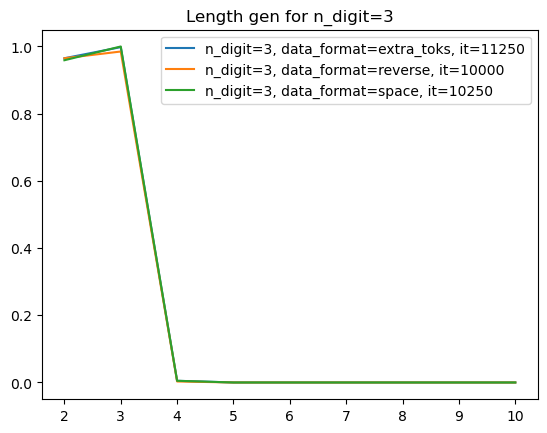

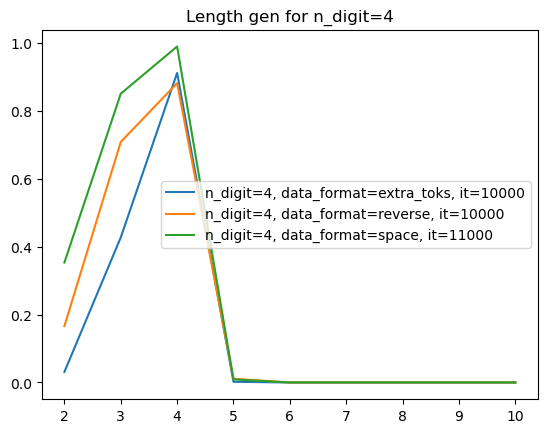

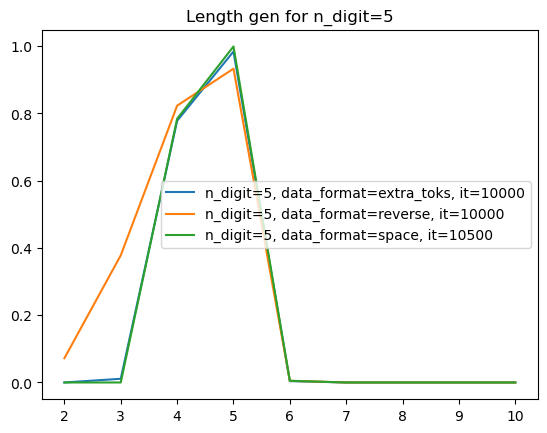

In [18]:
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
import pandas as pd

path = 'out/nl-pretraining/gpt2-reverse-n_digit-{n_digit}-data_format-{data_format}-init_pretrained-{init_pretrained}'

digits = list(range(2, 11))
for n_digit in ['3', '4', '5']:
    plt.figure()
    plt.title('Length gen for n_digit={}'.format(n_digit))
    for data_format in ['extra_toks', 'reverse', 'space']:
        for init_pretrained in ['True']:
            files = sorted(glob(path.format(n_digit=n_digit, data_format=data_format, init_pretrained=init_pretrained) + '/eval_logs/*'))
            if len(files) == 0:
                continue
            # pick the most recent file
            df = pd.read_csv(files[-1], index_col='it')
            row = df.iloc[-1]
            it = row.name
            val_accs = []
            for d in digits:
                val_accs.append(row['val_acc_{}'.format(d)])
            plt.plot(digits, val_accs, label='n_digit={}, data_format={}, it={}'.format(n_digit, data_format, it))
            plt.legend()